## Support Vector Machines

In [1]:
from init import *

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.svm as svm
from sklearn import metrics
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
X = train_features.reshape(50000, 3*32*32)
Xt = test_features.reshape(10000, 3*32*32)
y = train_labels.flatten()
yt = test_labels.flatten()

In [10]:
def SVM_SVC(_X=None, _Xt=None):
    if _X is None:
        _X = X
    
    if _Xt is None:
        _Xt = Xt
    
    msg("[SVM SVC] Training")
    svc = svm.SVC(verbose=True)
    svc.fit(X, y)
    done()
    
    msg("[SVM SVC] Training Accuracy")
    X_pred = svc.predict(X)
    msg(metrics.accuracy_score(y, X_pred))
    done()
    
    msg("[SVM SVC] Testing Accuracy")
    Xt_pred = svc.predict(Xt)
    msg(metrics.accuracy_score(yt, Xt_pred))
    done()

In [ ]:
SVM_SVC()

[SVM SVC] Training ... [LibSVM]

In [ ]:
X

In [ ]:
svc = svm.SVC(verbose=True)
svc.fit(X, y)

In [6]:
res = pd.DataFrame([
        [ '2', 10.00 ],
        [ '3', 10.00 ],
#         [ '4', 10.00 ],
#         [ '5', 10.00 ],
#         [ '6', 10.00 ],
        [ '100', 10.53 ],
        [ '500', 11.46 ],
        [ '1000', 12.07 ],
        [ '2000', 12.98 ],
        [ '3000', 13.72 ],
        [ '$\infty$ (-1)', 14.77 ]
    ], columns=['Iterations', 'Accuracy'])
res

,Iterations,Accuracy
0,2,10.00
1,3,10.00
2,100,10.53
3,500,11.46
4,1000,12.07
5,2000,12.98
6,3000,13.72
7,$\infty$ (-1),14.77


In [7]:
print(res)

      Iterations  Accuracy
0              2     10.00
1              3     10.00
2            100     10.53
3            500     11.46
4           1000     12.07
5           2000     12.98
6           3000     13.72
7  $\infty$ (-1)     14.77


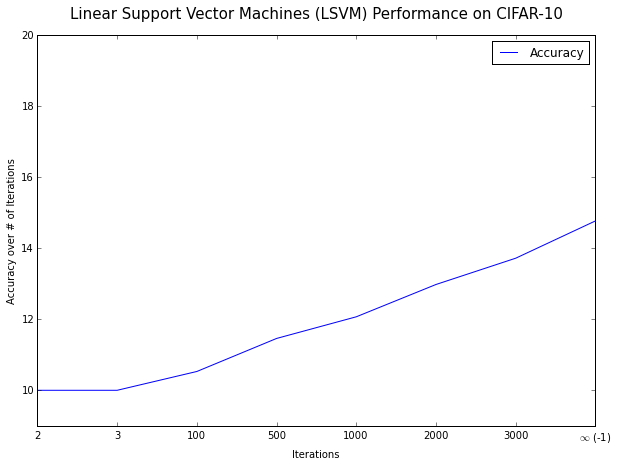

In [8]:
ax = res.plot(x='Iterations', y='Accuracy', figsize=(10, 7))
ax.set_ylim(9, 20)
ax.set_ylabel('Accuracy over # of Iterations')
ax.set_title('Linear Support Vector Machines (LSVM) Performance on CIFAR-10', y=1.03, fontdict={'fontsize': 15})

### Result
Linear Support Vector Machines (SVMs) are performing very poorly on the given problem. Maybe other kernels prove to be better.

## Polynomial Support Verctor Machines

In [5]:
def SVM_SVC_POLY(_X=None, _Xt=None, I=2):
    if _X is None:
        _X = X
    
    if _Xt is None:
        _Xt = Xt
    
    msg("[SVM POLY %d] Training" %I)
    svc = svm.SVC(kernel='poly', max_iter=I)
    svc.fit(X, y)
    done()
    
    pydump(svc, "pickles/svc_{kernel}_{i}.pickle".format(kernel='poly', i=I))
    
    msg("[SVM POLY %d] Training Accuracy"%I)
    X_pred = svc.predict(X)
    msg(metrics.accuracy_score(y, X_pred))
    done()
    
    msg("[SVM POLY %d] Testing Accuracy"%I)
    Xt_pred = svc.predict(Xt)
    msg(metrics.accuracy_score(yt, Xt_pred))
    done()
    
    pydump(svc.predict_proba(Xt), "pickles/svc_{kernel}_{i}_predict_proba.pickle".format(kernel='poly', i=I))

In [7]:
svc = pyload("pickles/svc_poly_-1.pickle")


from threading import Thread

count = 0
parts = {}
def classify_batches(i, x):
    global count
    global parts
    
    count += x.shape[0]
    print("\rClassifying {} ...".format(count), end="")
    parts[i] = svc.predict(x)

msg("[SVM POLY %d] Testing Accuracy"%-1)
threads = []
for i in range(1000):
    t = Thread(target=classify_batches, args=(i, Xt[i*10:(i+1)*10]), daemon=True)
    t.start()
    threads += [t]

for t in threads:
    t.join()

Xt_pred = np.array([parts[i] for i in range(1000)]).reshape(-1,1)
    
# Xt_pred = async_result.get()
# Xt_pred = np.array([classify_batches() ]).reshape(-1,1)
# Xt_pred = svc.predict(Xt[:10])
msg(metrics.accuracy_score(yt, Xt_pred))
done()

Classifying 10000 ...0.4 ... done.


In [10]:
pydump(Xt_pred, "pickles/svc_{kernel}_{i}_predict.pickle".format(kernel='poly', i=-1))

In [6]:
SVM_SVC_POLY(I=-1)

[SVM POLY -1] Training ... done.
[SVM POLY -1] Training Accuracy ... 1.0 ... done.
[SVM POLY -1] Testing Accuracy ... 0.4988 ... done.


AttributeError: predict_proba is not available when  probability=False

In [9]:
SVM_SVC_POLY(I=3)

[SVM POLY] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM POLY] Training Accuracy ... 0.11272 ... done.
[SVM POLY] Testing Accuracy ... 0.11 ... done.


In [10]:
SVM_SVC_POLY(I=100)

[SVM POLY] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM POLY] Training Accuracy ... 0.16994 ... done.
[SVM POLY] Testing Accuracy ... 0.1722 ... done.


In [12]:
for i in [500,1000,2000,3000,-1]:
    SVM_SVC_POLY(I=i)

[SVM POLY 500] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM POLY 500] Training Accuracy ... 0.29246 ... done.
[SVM POLY 500] Testing Accuracy ... 0.2765 ... done.
[SVM POLY 1000] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM POLY 1000] Training Accuracy ... 0.31456 ... done.
[SVM POLY 1000] Testing Accuracy ... 0.2908 ... done.
[SVM POLY 2000] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM POLY 2000] Training Accuracy ... 0.40668 ... done.
[SVM POLY 2000] Testing Accuracy ... 0.3456 ... done.
[SVM POLY 3000] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM POLY 3000] Training Accuracy ... 0.47364 ... done.
[SVM POLY 3000] Testing Accuracy ... 0.3815 ... done.
[SVM POLY -1] Training ... done.
[SVM POLY -1] Training Accuracy ... 1.0 ... done.
[SVM POLY -1] Testing Accuracy ... 0.4988 ... done.


In [80]:
res_poly = pd.DataFrame([
        ['2', 12.07],
        ['3', 11.00],
        ['100', 17.22 ],
        ['500', 27.65 ],
        ['1000', 29.08 ],
        ['2000', 34.56 ],
        ['3000', 38.15 ],
        ['$\infty$ (-1)', 49.88 ]
    ], columns=['Iterations', 'Accuracy'])
res_poly

,Iterations,Accuracy
0,2,12.07
1,3,11.00
2,100,17.22
3,500,27.65
4,1000,29.08
5,2000,34.56
6,3000,38.15
7,$\infty$ (-1),49.88


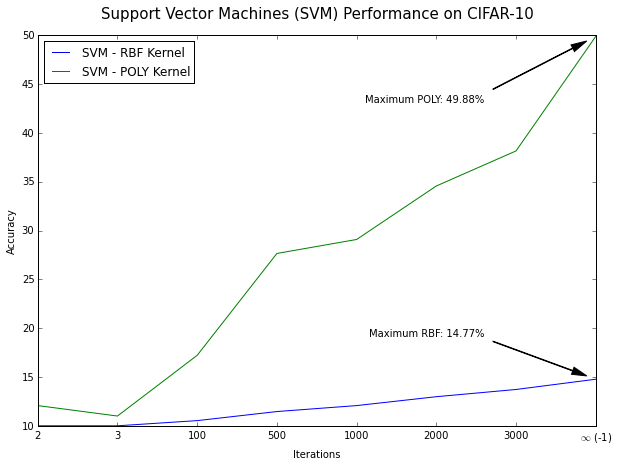

In [83]:
ax = res.plot(x='Iterations', y='Accuracy', figsize=(10, 7), label='SVM - RBF Kernel')
res_poly.plot(x='Iterations', y='Accuracy', figsize=(10, 7), ax=ax, label='SVM - POLY Kernel')
# ax.set_ylim(9, 20)
ax.set_ylabel('Accuracy')
ax.set_title('Support Vector Machines (SVM) Performance on CIFAR-10', y=1.03, fontdict={'fontsize': 15})
ax.annotate(
    'Maximum RBF: %.2f%%' % res.iloc[-1].Accuracy, xy=(7, res.iloc[-1].Accuracy),  xycoords='data',
    xytext=(0.8, 0.25), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.08, width=0.5, frac=0.15, headwidth=7.5),
    horizontalalignment='right', verticalalignment='top',
)
ax.annotate(
    'Maximum POLY: %.2f%%' % res_poly.iloc[-1].Accuracy, xy=(7, res_poly.iloc[-1].Accuracy),  xycoords='data',
    xytext=(0.8, 0.85), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.08, width=0.5, frac=0.15, headwidth=7.5),
    horizontalalignment='right', verticalalignment='top',
)

### Sigmoid Support Vector Machines

In [84]:
def SVM_SVC_SIG(_X=None, _Xt=None, I=2):
    if _X is None:
        _X = X
    
    if _Xt is None:
        _Xt = Xt
    
    msg("[SVM SIG %d] Training" %I)
    svc = svm.SVC(kernel='sigmoid', max_iter=I)
    svc.fit(X, y)
    done()
    
    msg("[SVM SIG %d] Training Accuracy"%I)
    X_pred = svc.predict(X)
    msg(metrics.accuracy_score(y, X_pred))
    done()
    
    msg("[SVM SIG %d] Testing Accuracy"%I)
    Xt_pred = svc.predict(Xt)
    msg(metrics.accuracy_score(yt, Xt_pred))
    done()

In [90]:
for i in [2,3,100,500,1000,2000,3000,-1]:
    SVM_SVC_SIG(I=i)

[SVM SIG 2] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM SIG 2] Training Accuracy ... 0.1 ... done.
[SVM SIG 2] Testing Accuracy ... 0.1 ... done.
[SVM SIG 3] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM SIG 3] Training Accuracy ... 0.1 ... done.
[SVM SIG 3] Testing Accuracy ... 0.1 ... done.
[SVM SIG 100] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM SIG 100] Training Accuracy ... 0.1 ... done.
[SVM SIG 100] Testing Accuracy ... 0.1 ... done.
[SVM SIG 500] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM SIG 500] Training Accuracy ... 0.1 ... done.
[SVM SIG 500] Testing Accuracy ... 0.1 ... done.
[SVM SIG 1000] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM SIG 1000] Training Accuracy ... 0.1 ... done.
[SVM SIG 1000] Testing Accuracy ... 0.1 ... done.
[SVM SIG 2000] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM SIG 2000] Training Accuracy ... 0.1 ... done.
[SVM SIG 2000] Testing Accuracy ... 0.1 ... done.
[SVM SIG 3000] Training ... 

/home/devyhia/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


done.
[SVM SIG 3000] Training Accuracy ... 0.1 ... done.
[SVM SIG 3000] Testing Accuracy ... 0.1 ... done.
[SVM SIG -1] Training ... done.
[SVM SIG -1] Training Accuracy ... 0.1 ... done.
[SVM SIG -1] Testing Accuracy ... 0.1 ... done.


In [91]:
res_sig = pd.DataFrame([
        ['2', 10],
        ['3', 10],
        ['100', 10],
        ['500', 10],
        ['1000', 10],
        ['2000', 10],
        ['3000', 10],
        ['$\infty$ (-1)', 10]
    ], columns=['Iterations', 'Accuracy']
)
res_sig

,Iterations,Accuracy
0,2,10
1,3,10
2,100,10
3,500,10
4,1000,10
5,2000,10
6,3000,10
7,$\infty$ (-1),10


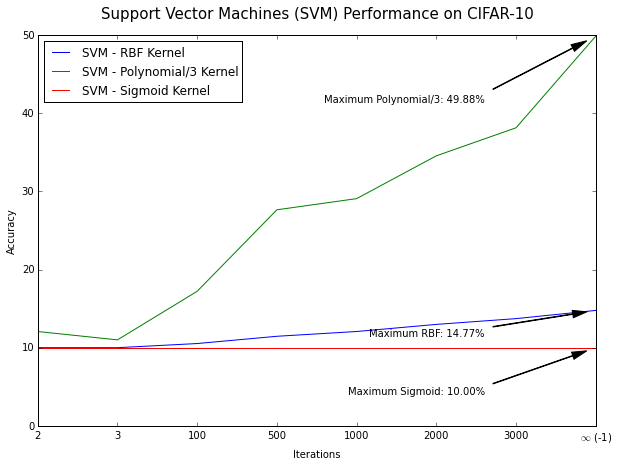

In [95]:
ax = res.plot(x='Iterations', y='Accuracy', figsize=(10, 7), label='SVM - RBF Kernel')
res_poly.plot(x='Iterations', y='Accuracy', figsize=(10, 7), ax=ax, label='SVM - Polynomial/3 Kernel')
res_sig.plot(x='Iterations', y='Accuracy', figsize=(10, 7), ax=ax, label='SVM - Sigmoid Kernel')
ax.set_ylim(0, 50)
ax.set_ylabel('Accuracy')
ax.set_title('Support Vector Machines (SVM) Performance on CIFAR-10', y=1.03, fontdict={'fontsize': 15})
ax.annotate(
    'Maximum RBF: %.2f%%' % res.iloc[-1].Accuracy, xy=(7, res.iloc[-1].Accuracy),  xycoords='data',
    xytext=(0.8, 0.25), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.08, width=0.5, frac=0.15, headwidth=7.5),
    horizontalalignment='right', verticalalignment='top',
)
ax.annotate(
    'Maximum Polynomial/3: %.2f%%' % res_poly.iloc[-1].Accuracy, xy=(7, res_poly.iloc[-1].Accuracy),  xycoords='data',
    xytext=(0.8, 0.85), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.08, width=0.5, frac=0.15, headwidth=7.5),
    horizontalalignment='right', verticalalignment='top',
)

ax.annotate(
    'Maximum Sigmoid: %.2f%%' % res_sig.iloc[-1].Accuracy, xy=(7, res_sig.iloc[-1].Accuracy),  xycoords='data',
    xytext=(0.8, 0.1), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.08, width=0.5, frac=0.15, headwidth=7.5),
    horizontalalignment='right', verticalalignment='top',
)

In [ ]:
NOTES:
    - SVM RBF with the other variable

### SVM POLY with PCA

In [13]:
def SVC_PCA_POLY(PCA=200, I=2):
    X = pyload("pickles/X_pca_{}.pickle".format(PCA))
    Xt = pyload("pickles/Xt_pca_{}.pickle".format(PCA))
    
    msg("[SVM POLY %d - PCA %d] Training" %(I, PCA))
    svc = svm.SVC(kernel='poly', max_iter=I, probability=True)
    svc.fit(X, y)
    done()
    
    pydump(svc, "pickles/svc_pca_{pca}_{kernel}_{i}.pickle".format(kernel='poly', i=I, pca=PCA))
    
    msg("[SVM POLY %d - PCA %d] Training Accuracy"%(I, PCA))
    X_pred = svc.predict(X)
    msg(metrics.accuracy_score(y, X_pred))
    done()
    
    msg("[SVM POLY %d - PCA %d] Testing Accuracy"%(I, PCA))
    Xt_pred = svc.predict(Xt)
    msg(metrics.accuracy_score(yt, Xt_pred))
    done()
    
    pydump(svc.predict_proba(Xt), "pickles/svc_pca_{pca}_{kernel}_{i}_predict_proba.pickle".format(kernel='poly', i=I, pca=PCA))

In [14]:
SVC_PCA_POLY(PCA=50, I=-1)

[SVM POLY -1 - PCA 50] Training ... done.
[SVM POLY -1 - PCA 50] Training Accuracy ... 1.0 ... done.
[SVM POLY -1 - PCA 50] Testing Accuracy ... 0.4133 ... done.


In [16]:
pca_200 = PCA(n_components=200)
pca_200.fit(X, y)

X_pca_200 = pca_200.transform(X)
Xt_pca_200 = pca_200.transform(Xt)

pydump(pca_200, "pickles/pca_200.pickle")
pydump(X_pca_200, "pickles/X_pca_200.pickle")
pydump(Xt_pca_200, "pickles/Xt_pca_200.pickle")

In [17]:
SVC_PCA_POLY(PCA=200, I=-1)

[SVM POLY -1 - PCA 200] Training ... done.
[SVM POLY -1 - PCA 200] Training Accuracy ... 1.0 ... done.
[SVM POLY -1 - PCA 200] Testing Accuracy ... 0.4485 ... done.
